## Data Cleaning, Describing, and Visualization

### Step 1 - Get your environment setup

1. Install Git on your computer and fork the class repository on [Github](https://github.com/tfolkman/byu_econ_applied_machine_learning).
2. Install [Anaconda](https://conda.io/docs/install/quick.html) and get it working.

### Step 2 - Explore Datasets

The goals of this project are:

1. Read in data from multiple sources
2. Gain practice cleaning, describing, and visualizing data

To this end, you need to find from three different sources. For example: CSV, JSON, and API, SQL, or web scraping. For each of these data sets, you must perform the following:

1. Data cleaning. Some options your might consider: handle missing data, handle outliers, scale the data, convert some data to categorical.
2. Describe data. Provide tables, statistics, and summaries of your data.
3. Visualize data. Provide visualizations of your data.

These are the typical first steps of any data science project and are often the most time consuming. My hope is that in going through this process 3 different times, that you will gain a sense for it.

Also, as you are doing this, please tell us a story. Explain in your notebook why are doing what you are doing and to what end. Telling a story in your analysis is a crucial skill for data scientists. There are almost an infinite amount of ways to analyze a data set; help us understand why you choose your particular path and why we should care.

Also - this homework is very open-ended and we provided you with basically no starting point. I realize this increases the difficulty and complexity, but I think it is worth it. It is much closer to what you might experience in industry and allows you to find data that might excite you!

### Grading

This homework is due **Jan. 31, 2019 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Ability to read in data - 10%
* Ability to describe data - 20%
* Ability to visualize data - 20%
* Ability to clean data - 20%
* Storytelling - 20%

In [236]:
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3 as sql

In [46]:
#I want to do a movie marathon and I want to use this data to decide which movies to watch. 

#Import movie data as a JSON 
with open("movies.json", "r") as f:
    json_movie_data = json.load(f)

In [50]:
#Save data as a series
series = pd.Series(json_movie_data)
series.head()

0    {'title': 'After Dark in Central Park', 'year'...
1    {'title': 'Boarding School Girls' Pajama Parad...
2    {'title': 'Buffalo Bill's Wild West Parad', 'y...
3    {'title': 'Caught', 'year': 1900, 'cast': [], ...
4    {'title': 'Clowns Spinning Hats', 'year': 1900...
dtype: object

In [54]:
#Create a data frame from the data
movies = pd.DataFrame(json_movie_data)
movies

,cast,genres,title,year
0,[],[],After Dark in Central Park,1900
1,[],[],Boarding School Girls' Pajama Parade,1900
2,[],[],Buffalo Bill's Wild West Parad,1900
3,[],[],Caught,1900
4,[],[],Clowns Spinning Hats,1900
5,[],"[Short, Documentary]",Capture of Boer Battery by British,1900
6,[],[],The Enchanted Drawing,1900
7,[Paul Boyton],[],Feeding Sea Lions,1900
8,[],[Comedy],How to Make a Fat Wife Out of Two Lean Ones,1900
9,[],[],New Life Rescue,1900


In [106]:
#Cleaning the data and removing all the empty lists
movies1 = movies[movies.astype(str)['cast'] != '[]'] 
movies_cleaned = movies1[movies1.astype(str)['genres'] != '[]']
movies_cleaned

,cast,genres,title,year
15,[Ching Ling Foo],[Short],"The Wonder, Ching Ling Foo",1900
242,"[J. Stuart Blackton, Florence Lawrence]","[Short, Crime, Drama]",The Automobile Thieves,1906
245,[J. Stuart Blackton],"[Short, Animated, Animated]",Humorous Phases of Funny Faces,1906
250,[William S. Hart],[Historical],Ben-Hur,1907
251,"[William Craven, Florence Lawrence]",[Biography],Daniel Boone,1907
252,[Unknown],[Comedy],How Brown Saw the Baseball Game,1907
253,"[Bertha Regustus, Edward Boulden]",[Comedy],Laughing Gas,1907
256,"[Arthur V. Johnson, Linda Arvidson]",[Drama],The Adventures of Dollie,1908
258,"[Linda Arvidson, George Gebhardt]",[Comedy],Balked at the Altar,1908
259,"[Charles Inslee, Linda Arvidson]",[Drama],The Bandit's Waterloo,1908


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


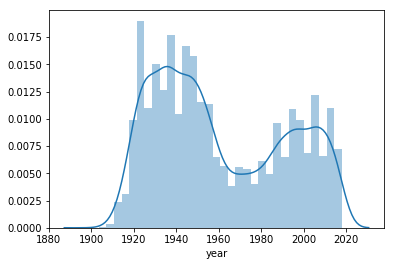

In [231]:
#Graph the movies by the year they were released.
sns.distplot(movies_cleaned.year, kde=True)

In [121]:
#Find the mode for each variable. 
movies_cleaned.astype(str).mode(axis=0)


,cast,genres,title,year
0,['Harold Lloyd'],['Drama'],Treasure Island,1919


In [134]:
#Find all the movies with the title "Treasure Island"
title = movies_cleaned[movies_cleaned.astype(str)['title'] == 'Treasure Island']
title

,cast,genres,title,year
1147,"[Francis Carpenter, Virginia Lee Corbin]",[Adventure],Treasure Island,1918
1907,"[Lon Chaney, Shirley Mason]",[Adventure],Treasure Island,1920
7255,"[Wallace Beery, Jackie Cooper, Lionel Barrymore]",[Adventure],Treasure Island,1934
13901,"[Bobby Driscoll, Robert Newton]",[Adventure],Treasure Island,1950
18579,"[Richard Dawson, Davy Jones, Dal McKennon]",[Adventure],Treasure Island,1972
18580,"[Orson Welles, Lionel Stander, Walter Slezak]",[Adventure],Treasure Island,1972
21787,"[Christian Bale, Charlton Heston]",[Adventure],Treasure Island,1990


In [137]:
#Count how many movies were made in the year 1919
year = movies_cleaned[movies_cleaned['year'] == 1919]
year.count()

cast      632
genres    632
title     632
year      632
dtype: int64

In [ ]:
#This shows us that the most common cast listed was Harold Lloyd. 
#The most common genre of movie was Drama.
#The most common movie title was Treasure Island with 7 different movies made from 1918 to 1990. 
#And the most movies were made in the year 1919 with 632 movies. 

In [ ]:
#Ultimately, I decided to do a movie marathon and watch the 7 different versions of Treasure Island. 

In [200]:
#I am curious to see how I would have competed compared to the other athletes in the Olympics.
#Import Olympic data as a CSV 
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [210]:
#Drop the NaN values (but keep the NaN values under Medal)
olympic_data = data.dropna(subset=['Age','Height', 'Weight'])
olympic_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [211]:
#Get the summary statistics from the data
olympic_data.describe()

,ID,Age,Height,Weight,Year
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,68616.017675,25.055509,175.371950,70.688337,1989.674678
std,38996.514355,5.483096,10.546088,14.340338,20.130865
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


In [212]:
#Get the correlation between the variables
olympic_data.corr()
#The variables with the highest correlation are height and weight, which was to be expected.

,ID,Age,Height,Weight,Year
ID,1.000000,-0.002100,-0.012190,-0.009039,0.007067
Age,-0.002100,1.000000,0.141684,0.212041,0.089142
Height,-0.012190,0.141684,1.000000,0.796573,0.048142
Weight,-0.009039,0.212041,0.796573,1.000000,0.022175
Year,0.007067,0.089142,0.048142,0.022175,1.000000


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


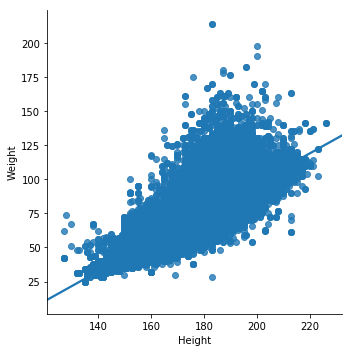

In [213]:
#Scatter plot of the relationship between height and weights
sns.lmplot(x="Height", y="Weight", data=olympic_data)

In [214]:
#Return the number of athletes for the top 30 countries with the most athletes
olympic_data['Team'].value_counts().head(30)

United States     13714
France             7807
Canada             7668
Great Britain      7499
Italy              7433
Japan              7339
Germany            6997
Australia          6509
Poland             5667
Sweden             5251
Soviet Union       4757
China              4712
Hungary            4665
Russia             4614
Finland            4365
Spain              4281
Switzerland        3918
South Korea        3751
Netherlands        3684
Romania            3421
West Germany       3159
Brazil             3129
Bulgaria           3015
Norway             3014
Austria            2984
Czechoslovakia     2685
East Germany       2511
Ukraine            2380
Mexico             2291
Cuba               2201
Name: Team, dtype: int64

In [215]:
#Return the number of medals each country has won and print the first 30
medals = olympic_data.groupby(['Team'])['Medal'].value_counts()
medals.head(30)

Team                          Medal 
Afghanistan                   Bronze      2
Algeria                       Bronze      6
                              Gold        5
                              Silver      4
Amateur Athletic Association  Gold        2
Aphrodite                     Bronze      3
Argentina                     Bronze     78
                              Gold       72
                              Silver     66
Argonaut Rowing Club          Bronze      1
Armenia                       Bronze      8
                              Silver      5
                              Gold        2
Australasia                   Bronze      3
                              Silver      1
Australia                     Bronze    471
                              Silver    412
                              Gold      313
Australia-1                   Bronze      2
                              Gold        2
Austria                       Bronze     96
                              Silver   

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


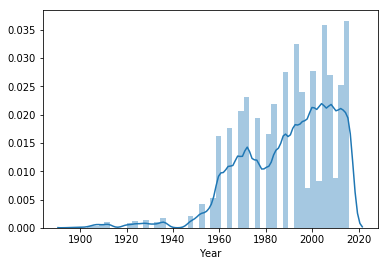

In [216]:
#Graph of the number of atheletes per year
sns.distplot(olympic_data.Year, kde=True)

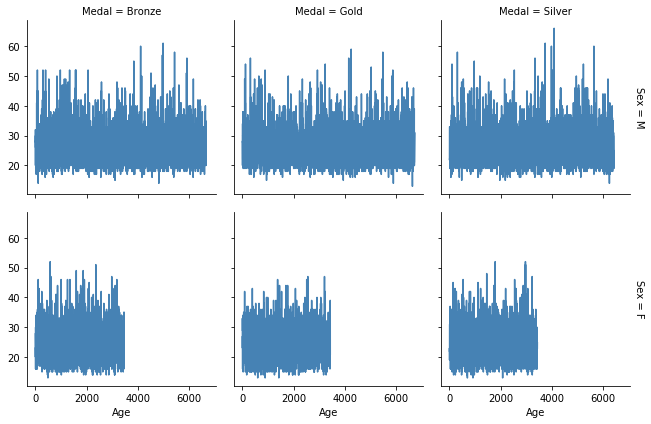

In [234]:
g = sns.FacetGrid(olympic_data, row="Sex", col="Medal", margin_titles=True)
g.map(plt.plot, "Age", color="steelblue")

In [217]:
#After looking over the summary statistics, I decided I wanted to see how well I would have competed in the Tug-Of-War.
#Get the athletes that competed in the Tug-Of-War
tug_o_war = olympic_data[olympic_data['Sport'] == 'Tug-Of-War']
tug_o_war

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
15011,8105,"Edward ""Ned"" Barrett",M,30.0,185.0,99.0,London City Police-1,GBR,1908 Summer,1908,Summer,London,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
32549,16735,"Wilbur Gordon Burroughs, Sr.",M,23.0,188.0,89.0,United States,USA,1908 Summer,1908,Summer,London,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN
43065,22209,"William Wesley Coe, Jr.",M,29.0,178.0,95.0,United States,USA,1908 Summer,1908,Summer,London,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN
52259,26855,Arthur Kent Dearborn,M,21.0,178.0,91.0,United States,USA,1908 Summer,1908,Summer,London,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN
57711,29549,"Wilhelm ""Willy"" Drr",M,24.0,182.0,81.0,Germany,GER,1906 Summer,1906,Summer,Athina,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
70135,35717,John Joseph Flanagan,M,40.0,178.0,95.0,United States,USA,1908 Summer,1908,Summer,London,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN
77862,39535,Nikolaos P. Georgantas,M,24.0,185.0,81.0,Pan-Hellenic Athletic Club,GRE,1904 Summer,1904,Summer,St. Louis,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN
98825,50016,"Marquis Franklin ""Bill"" Horr",M,27.0,183.0,93.0,United States,USA,1908 Summer,1908,Summer,London,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN
110214,55729,"Samuel Symington ""Sam"" Jones",M,24.0,189.0,82.0,New York Athletic Club-4,USA,1904 Summer,1904,Summer,St. Louis,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,NaN
112508,56975,Carl Kaltenbach,M,23.0,184.0,77.0,Germany,GER,1906 Summer,1906,Summer,Athina,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [207]:
#After discovering that only men participated in Tug-of-War, I decided to see how I would compete in women's swimming. 
#So I filtered the data to only have the female atheletes that competed in swimming. 
women = olympic_data[olympic_data['Sex'] == "F"]
w_swim = women[women['Sport'] == 'Swimming']
w_swim

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
474,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 100 metres Backstroke,NaN
475,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 200 metres Backstroke,NaN
476,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze
729,417,Sara Helena berg,F,17.0,190.0,73.0,Sweden,SWE,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 50 metres Freestyle,NaN
969,546,Inna Vladimirovna Abramova,F,21.0,172.0,63.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 50 metres Freestyle,NaN
970,546,Inna Vladimirovna Abramova,F,21.0,172.0,63.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN
1421,799,Nafissatou Moussa Adamou,F,14.0,172.0,72.0,Niger,NIG,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 50 metres Freestyle,NaN
1440,803,Anne Wilma Adams (-King),F,16.0,165.0,54.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Women's 200 metres Butterfly,NaN
1441,803,Anne Wilma Adams (-King),F,16.0,165.0,54.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Women's 400 metres Individual Medley,NaN
1455,811,Natalie Cammile Adams (-Brannan),F,20.0,173.0,65.0,United States,USA,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Butterfly,NaN


In [230]:
#Get the summary statistics for women swimmers. 
w_swim.describe()

#I am at 75% for age, <25% for height, and <25% for weight.

,ID,Age,Height,Weight,Year
count,8460.000000,8455.000000,8460.000000,8460.000000,8460.000000
mean,69067.852837,19.571141,171.515366,61.481501,1992.506856
std,39032.617314,3.832996,7.057421,6.583490,16.884980
min,259.000000,11.000000,131.000000,39.000000,1924.000000
25%,35071.000000,17.000000,167.000000,57.000000,1976.000000
50%,70314.000000,19.000000,171.000000,61.000000,1996.000000
75%,102187.000000,22.000000,176.000000,66.000000,2008.000000
max,135489.000000,41.000000,193.000000,85.000000,2016.000000


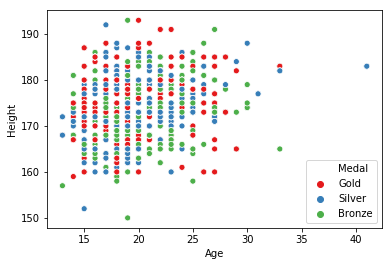

In [237]:
#Create a scatterplot of medals won based on height and age to see where I would fall. 
w = sns.scatterplot(x="Age", y="Height", hue="Medal", palette="Set1", hue_order=["Gold", "Silver", "Bronze"], data=w_swim)


In [ ]:
#According to this data, with my height (165cm) and my age (22), statiscally speaking my chances of winning a medal
#are very slim.  With my height and age, there have only be a few women that have won bronze medals.  The probability
#winning increases dramatically if you are younger and taller. 
#Thus, my dreams of winning a medal in the Olympics may never come true.

In [250]:
#I love rock climbing and I want to find new places in the US that are not too hard but fun. 
ascents = 0
grades = 0
users = 0
try:
    with sql.connect("database.sqlite") as conn:
        cur = conn.cursor()
        ascents = pd.read_sql_query("SELECT * FROM ascent WHERE country = 'USA'", conn)
        grades = pd.read_sql_query("SELECT * FROM grade", conn)
        users = pd.read_sql_query("SELECT * FROM user WHERE country = 'USA'", conn)
        
finally:
    conn.close()

In [248]:
ascents.head()

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
0,357,25,57,,0,1,1,900,917823600,1999,...,USA,fun,1,,255,0,0,0,0,0
1,358,25,57,,0,1,1,900,917823600,1999,...,USA,good,2,,255,0,0,0,0,0
2,359,25,57,,0,1,1,900,915145200,1999,...,USA,power,2,,0,0,0,0,0,0
3,360,25,55,,0,1,1,850,949359600,2000,...,USA,classic,2,,255,0,0,0,0,0
4,361,25,57,,0,1,1,900,957132000,2000,...,USA,power,1,,255,0,0,0,0,0


In [254]:
#Get summary statistics from the three different tables. 
desc_grades = grades.describe().T
desc_ascents = ascents.describe().T
desc_users = users.describe().T

pd.set_option('display.float_format', lambda x: '%.4f' % x)
desc_users.append(desc_grades).append(desc_ascents)

,count,mean,std,min,25%,50%,75%,max
id,11861.0000,31935.4798,19144.9555,5.0000,15770.0000,30825.0000,48415.0000,67023.0000
sex,11861.0000,0.1334,0.3400,0.0000,0.0000,0.0000,0.0000,1.0000
height,11861.0000,54.2161,81.2182,0.0000,0.0000,0.0000,168.0000,255.0000
weight,11861.0000,30.1704,35.1483,0.0000,0.0000,0.0000,68.0000,100.0000
started,11861.0000,1084.9057,998.6544,0.0000,0.0000,1994.0000,2006.0000,2050.0000
deactivated,11861.0000,0.0329,0.1783,0.0000,0.0000,0.0000,0.0000,1.0000
anonymous,11861.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
id,83.0000,42.8675,25.1113,1.0000,21.5000,42.0000,64.5000,86.0000
score,83.0000,617.5301,517.0857,0.0000,110.0000,550.0000,1062.5000,1575.0000
fra_routes_input,83.0000,0.4940,0.5030,0.0000,0.0000,0.0000,1.0000,1.0000


In [293]:
#After looking over the intial data, I decided I needed to join the ascent and user table in order to find the 
#information I am looking for. 
ascents_grades = 0
try:
    with sql.connect("database.sqlite") as conn:
        cur = conn.cursor()
        ascents_grades = pd.read_sql_query("""SELECT * 
                                              FROM ascent AS a INNER JOIN user AS u
                                              ON a.user_id == u.id
                                              WHERE a.country == 'USA'""", conn)
        
finally:
    conn.close()

In [294]:
ascents_grades.head()

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
0,357,25,57,,0,1,1,900,917823600,1999,...,None,None,None,None,None,None,None,None,0,0
1,358,25,57,,0,1,1,900,917823600,1999,...,None,None,None,None,None,None,None,None,0,0
2,359,25,57,,0,1,1,900,915145200,1999,...,None,None,None,None,None,None,None,None,0,0
3,360,25,55,,0,1,1,850,949359600,2000,...,None,None,None,None,None,None,None,None,0,0
4,361,25,57,,0,1,1,900,957132000,2000,...,None,None,None,None,None,None,None,None,0,0


In [295]:
#After looking over the initial data, I decided I wanted to route that people have said was fun.
#I also want a route and I don't want to do any bouldering, so I will filter out the bouldering (climb_type = 0). 
routes = ascents_grades[ascents_grades['climb_type'] == 1]
fun = routes[routes['comment'] == 'fun']
fun

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
0,357,25,57,,0,1,1,900,917823600,1999,...,None,None,None,None,None,None,None,None,0,0
5,362,25,57,,0,1,1,900,933458400,1999,...,None,None,None,None,None,None,None,None,0,0
480,3618,67,57,,0,1,1,900,965685600,2000,...,None,None,None,None,None,None,None,None,0,0
558,4335,307,51,,0,1,1,750,957132000,2000,...,None,None,None,None,None,None,None,None,0,0
770,5352,358,53,,0,5,1,895,976921200,2000,...,,,"Index, WA",None,,,1978-12-23,Working Class Hero,0,0
771,5353,358,49,,0,1,1,700,976921200,2000,...,,,"Index, WA",None,,,1978-12-23,Working Class Hero,0,0
772,5354,358,46,,0,5,1,745,976921200,2000,...,,,"Index, WA",None,,,1978-12-23,Working Class Hero,0,0
2497,19469,739,40,,0,1,1,500,995752800,2001,...,,,,,"Lincoln Woods, Bradley, Hammond Pond",,1981-11-21,,0,0
2499,19471,739,40,,0,2,1,553,995752800,2001,...,,,,,"Lincoln Woods, Bradley, Hammond Pond",,1981-11-21,,0,0
2546,19898,986,36,,0,1,1,400,994370400,2001,...,,,,None,ghetto ass staunton and richmond,,1984-07-17,I got real strong and then I got real lazy so ...,0,0


In [296]:
#In order to narrow my search father, I decided to narrow down to female climbers.
female = fun[fun['sex'] == 1]
female

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
7970,55788,2215,42,,0,2,1,603,1018476000,2002,...,,,,,,,None,,0,0
7973,55792,2215,44,,0,1,1,600,1005433200,2001,...,,,,,,,None,,0,0
8805,65664,2434,55,,0,1,1,850,1025906400,2002,...,Sickle,Metolius / Fiveten,"Lincoln Woods, Bishop, Rocktown, Little Rock City",None,,Quilting,1976-01-31,,0,0
12559,93216,1490,42,,0,2,1,603,1038351600,2002,...,,,"NRG, RRG, Rumney",None,,"Karate, Yoga",1974-03-13,,0,0
12562,93219,1490,42,,0,2,1,603,1038438000,2002,...,,,"NRG, RRG, Rumney",None,,"Karate, Yoga",1974-03-13,,0,0
12563,93220,1490,42,,0,2,1,603,1038438000,2002,...,,,"NRG, RRG, Rumney",None,,"Karate, Yoga",1974-03-13,,0,0
12564,93221,1490,42,,0,2,1,603,1038438000,2002,...,,,"NRG, RRG, Rumney",None,,"Karate, Yoga",1974-03-13,,0,0
13820,101017,3428,53,,0,1,1,800,1043276400,2003,...,La Sportiva,,"Farley, HP40, Joe's, Druids",None,,,1975-12-25,,0,0
14543,104707,3428,55,,0,1,1,850,1045954800,2003,...,La Sportiva,,"Farley, HP40, Joe's, Druids",None,,,1975-12-25,,0,0
18805,129891,4176,46,,0,1,1,650,1054850400,2003,...,,,Font,None,,,1968-11-22,,0,0


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


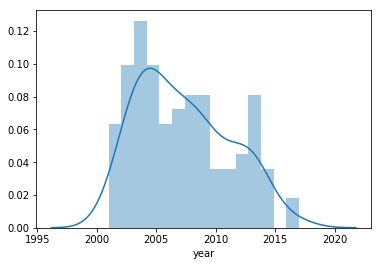

In [305]:
#It appears that the number of female climbers has declined significantly over the past 15 years.
sns.distplot(female.year, bins = 15, kde=True)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


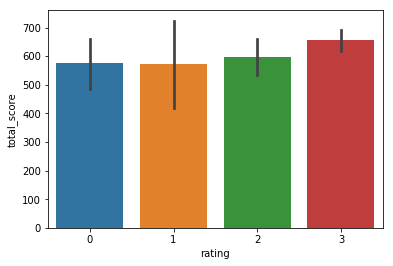

In [309]:
sns.barplot(female.rating, female.total_score)

#I found this to be interesting but I wish I knew what the different ratings meant.  
#There was no information given on the meanings of the ratings with the data. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


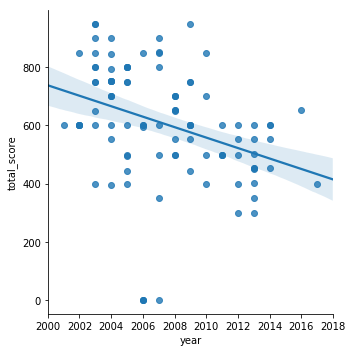

In [310]:
sns.lmplot(x="year", y="total_score", data=female)

#This was interesting that over the years, the total score has decreased. 
#Obviously, these can be different routes but the correlation still raises some questions. 

In [311]:
female.describe()

#From this data we see that the highest total score given was 950.

,id,user_id,grade_id,raw_notes,method_id,climb_type,total_score,date,year,last_year,...,exclude_from_ranking,user_recommended,chipped,id,sex,height,weight,started,deactivated,anonymous
count,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000,...,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000,104.0000
mean,1208001.2019,18404.3173,44.9038,0.5192,1.5192,1.0000,607.2019,1190608407.6923,2007.2885,0.0096,...,0.0192,0.0385,0.0000,18404.3173,1.0000,107.0865,31.5962,1616.4615,0.1346,0.0000
std,1069656.8417,13923.4718,7.0429,1.8485,1.0332,0.0000,197.2338,117938438.2558,3.8179,0.0981,...,0.1380,0.1932,0.0000,13923.4718,0.0000,76.8763,25.5527,792.5804,0.3430,0.0000
min,55788.0000,1315.0000,31.0000,0.0000,1.0000,1.0000,0.0000,1005433200.0000,2001.0000,0.0000,...,0.0000,0.0000,0.0000,1315.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,287073.7500,6235.0000,40.0000,0.0000,1.0000,1.0000,500.0000,1096668000.0000,2004.0000,0.0000,...,0.0000,0.0000,0.0000,6235.0000,1.0000,0.0000,0.0000,1996.0000,0.0000,0.0000
50%,887358.5000,14608.0000,44.0000,0.0000,1.0000,1.0000,602.0000,1171407600.0000,2007.0000,0.0000,...,0.0000,0.0000,0.0000,14608.0000,1.0000,155.0000,48.0000,1999.0000,0.0000,0.0000
75%,1646249.5000,32071.0000,49.5000,0.0000,2.0000,1.0000,750.7500,1266122700.0000,2010.0000,0.0000,...,0.0000,0.0000,0.0000,32071.0000,1.0000,167.2500,49.2500,2004.0000,0.0000,0.0000
max,4597271.0000,50912.0000,59.0000,10.0000,5.0000,1.0000,950.0000,1485558000.0000,2017.0000,1.0000,...,1.0000,1.0000,0.0000,50912.0000,1.0000,177.0000,68.0000,2010.0000,1.0000,0.0000


In [318]:
max_score = female[female['total_score'] == 950]
max_score

#This narrows it down to three different routes that were given the highest ratings by female climbers. 

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
246309,1616227,32071,59,,0,1,1,950,1050012000,2003,...,La Sportiva,sanuck,,None,"hueco, squamish",life and truthfulness,1975-12-31,http://thomasinapidgeon.blogspot.com,0,0
246314,1616233,32071,59,,0,1,1,950,1050444000,2003,...,La Sportiva,sanuck,,None,"hueco, squamish",life and truthfulness,1975-12-31,http://thomasinapidgeon.blogspot.com,0,0
247170,1622244,32071,59,Soft,8,1,1,950,1236121200,2009,...,La Sportiva,sanuck,,None,"hueco, squamish",life and truthfulness,1975-12-31,http://thomasinapidgeon.blogspot.com,0,0


In [ ]:
#Overall, I found the three routes that I would like to try. However, I have yet to discover how to decipher 
#the route based on the id given in the data.
#Also, I wish I had more information on the variables and what they mean in order to perform a more thorough 
#analysis of the data.  There were many variables that I simply did not know what they represented. 
#This information was not included with the original data. 

In [319]:
#I just did this for fun to try to get some experience with webscrapping. 
#I didn't know what else to do with it though. 
#This is something that I would definitely like more experience with. 

#Webscrape data from the Wikipedia page for Mitochondrial Eve
site_text = requests.get("https://en.wikipedia.org/wiki/Mitochondrial_Eve").text
soup = BeautifulSoup(site_text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Mitochondrial Eve - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Mitochondrial_Eve","wgTitle":"Mitochondrial Eve","wgCurRevisionId":880867062,"wgRevisionId":880867062,"wgArticleId":89792,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","CS1 maint: Multiple names: authors list","All articles with unsourced statements","Articles with unsourced statements from May 2018","Articles with unsourced statements from October 2018","Spoken articles","Articles with hAudio microformats","Commons cat

In [79]:
toc = soup.find("div", id="toc")
print(toc.text[:100])

Contents

1 History

1.1 Early research
1.2 1987 publication
1.3 Criticism and later research


2 Fe


In [78]:
topic_list = [a.text for a in toc.find_all('a')]
topic_list

['1 History',
 '1.1 Early research',
 '1.2 1987 publication',
 '1.3 Criticism and later research',
 '2 Female and mitochondrial ancestry',
 '3 Popular reception and misconceptions',
 '3.1 Not the only woman',
 '3.2 Not a fixed individual over time',
 '3.3 Not necessarily a contemporary of "Y-chromosomal Adam"',
 '3.4 Not the most recent ancestor shared by all humans',
 '4 See also',
 '5 References',
 '6 Further reading',
 '7 External links']